# Logistic Regression
###### *Shaiq Munir Malik*



### Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{0, +1\})$.
Your goal in this assignment is to implement Logistic Regression classifier. Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$ . 

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack+\frac{\lambda}{2}\sum_{i=1}^k \theta_k^2$$

The gradient of this cost functions is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,k$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}+\lambda*\theta_k$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.

In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

### Create some dummy data for testing

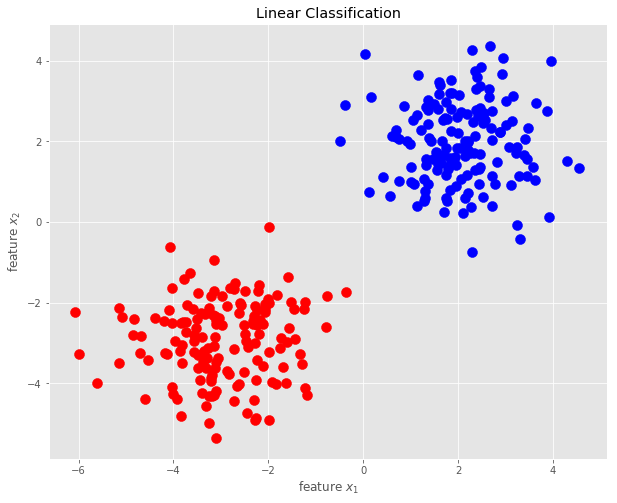

In [3]:
#Please carefully read the code to understand it...
np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),np.zeros((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-lr.svg',format='svg')

In [4]:
#Implement the SVM using TensorFlow...
import tensorflow as tf

In [5]:
alpha=0.1 # learning rate
epochs=200 # number of epochs..

In [6]:
nexamples=X.shape[0]

In [7]:
print X.shape 

(300, 2)


In [8]:
#reg hyper-parameter
lembda=tf.constant(0.01)

# placeholder of shape None,2
Xi=tf.placeholder(tf.float32,[None,2])
# placeholder of shape None,1
Yi=tf.placeholder(tf.float32,[None,1])

# variable of shape None 2,1
W=tf.Variable(tf.zeros([2,1]),name="weight")

# variable of shape None 1
b=tf.Variable(tf.zeros([1]),name="bias")
# take a look at the hyp formula and implemet here
h=tf.sigmoid(tf.add(tf.matmul(Xi,W),b))
#take a look at the cost formula and implemet here
cost =tf.add(tf.negative(tf.multiply(Yi,tf.log(h))),tf.negative(tf.multiply(tf.subtract(1.0,Yi),tf.log(tf.subtract(1.0,h)))))
#mean of cost
data_loss = tf.reduce_mean(cost)
# remember too add reg
reg = tf.add(tf.divide(tf.multiply(tf.reduce_sum(tf.pow(W,2)),lembda),2),data_loss)

loss=tf.add(data_loss, lembda * reg * 0.5)

optimizer=tf.train.GradientDescentOptimizer(0.001).minimize(loss)

init=tf.global_variables_initializer()

In [9]:
with tf.Session() as sess:
    sess.run(init)
    
    for e in range (epochs):        
        #shuffle training data 
        #[X,Y]=t.shuffle_data(X,Y)
        Xsplit=np.split(X,100)# batch size of 100
        Ysplit=np.split(Y,100) 
        
        for i in range(len(Xsplit)):
            sess.run(optimizer,feed_dict={Xi:Xsplit[i],Yi:Ysplit[i]})
            
        if e % 10 ==0:
            print ('After {} Epochs Loss Function Value is {}'.format(e, sess.run(loss,feed_dict={Xi:X,Yi:Y})))
        
    theta=np.array(sess.run(W))
    bias=np.array(sess.run(b))
    print theta, bias
        

After 0 Epochs Loss Function Value is 0.468033403158
After 10 Epochs Loss Function Value is 0.109336599708
After 20 Epochs Loss Function Value is 0.0661389902234
After 30 Epochs Loss Function Value is 0.0487352870405
After 40 Epochs Loss Function Value is 0.039140380919
After 50 Epochs Loss Function Value is 0.0329900272191
After 60 Epochs Loss Function Value is 0.0286790840328
After 70 Epochs Loss Function Value is 0.0254726707935
After 80 Epochs Loss Function Value is 0.0229847859591
After 90 Epochs Loss Function Value is 0.020992198959
After 100 Epochs Loss Function Value is 0.0193565562367
After 110 Epochs Loss Function Value is 0.0179870668799
After 120 Epochs Loss Function Value is 0.0168217979372
After 130 Epochs Loss Function Value is 0.0158168934286
After 140 Epochs Loss Function Value is 0.0149403503165
After 150 Epochs Loss Function Value is 0.0141682643443
After 160 Epochs Loss Function Value is 0.0134825017303
After 170 Epochs Loss Function Value is 0.0128688439727
After 1

In [10]:
theta=np.vstack((theta,bias[:,np.newaxis]))

In [11]:
print theta

[[-1.24318194]
 [-1.18175733]
 [-0.26098797]]


[ 6.17460155] [-5.00605488]


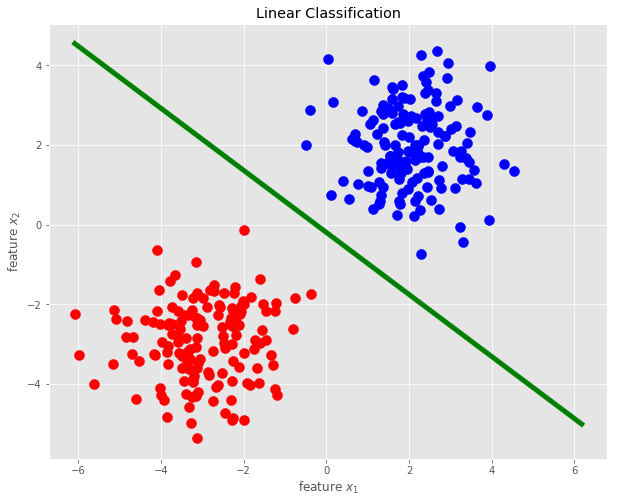

In [12]:
# Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-theta[2]-theta[0]*minx)/theta[1]
y2=(-theta[2]-theta[0]*maxx)/theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-lr-class.svg',format='svg')

-6.07926670885 -6.07945486257 4.54867721044 4.54877475848
(1000, 3)


/home/shaiq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


(-5.3678375947281065, 4.3540144301612509)

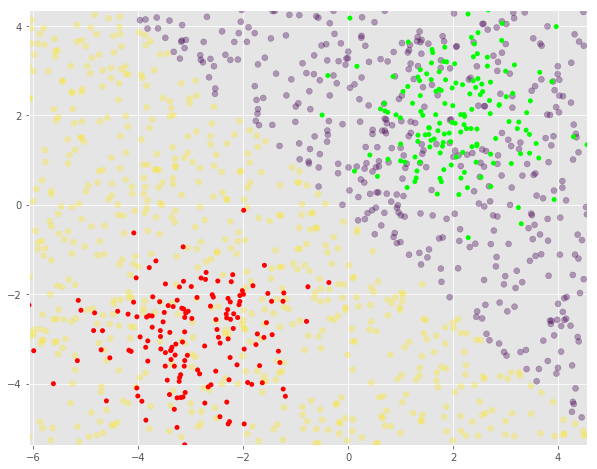

In [13]:
npts=1000
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.min(), X.min(), tx.max(), X.max()
tx=np.hstack((tx,np.ones((tx.shape[0],1))))
print tx.shape

cs= np.dot(tx,theta) > 0
#print cs.flatten(), np.unique(cs).flatten()
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y),), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

In [1]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print Ytest
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])
t.print_confusion_matrix(pclasses.ravel(),Ytest.ravel())

NameError: name 'Ytest' is not defined